# The Curious Case(s) For Dr. Snow (p224)

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Authors: <b>Aymen Merrouche</b> and Pierre-Henri Wuillemin.

**This notebook follows the example from "The Book Of Why" (Pearl, 2018) chapter 7 page 224**

## Instrumental Variables

In [1]:
from IPython.display import display, Math, Latex,HTML

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb
import os

> England was struck in 1853 and in 1854 by an epidemic of cholera, the miasma theory was advanced. But Dr. Jhon Snow, who took care of cholera victims did not believe it. His investigations led him to believe that cholera was due to the consumption of contaminated water. The Londoners, at the time, got their water from two companies, one of which was delivering water contaminated by excrements of the cholera victims.

### Causal diagram for cholera (before the introduction of an instrumental variable):

> Statistics have comforted snow in its hypothesis, indeed the inhabitants of districts served by the company with contaminated water were much more affected by the epidemic. However, it is not sufficient to invalidate the miasma theory. Miasma concentration could be, for instance, stronger in those particular districts. The corresponding causal is the following:

In [2]:
c1 = gum.fastBN("Water Purity->Cholera")
c1

(pyAgrum.BayesNet<double>@0x56355637bf90) BN{nodes: 2, arcs: 1, domainSize: 4, dim: 3, mem: 48o}

> Miasma, poverty and other confounders are to be considered:

In [3]:
c1Modele = csl.CausalModel(c1, [("Miasma, Poverty, etc", ["Water Purity","Cholera"])],True)
cslnb.showCausalImpact(c1Modele,"Cholera",doing="Water Purity",values={"Water Purity":1})

> We cannot observe any of these confounders (miasma, poverty, etc.), so we can't control for it using back-door adjustment. Therefore, there is no way to discredit the miasma theory.

### Causal diagram for cholera (after the introduction of an instrumental variable):

> Dr. Snow then turned to the districts that were served by the two water companies at the same time, these districts' households did not differ in terms of miasma or poverty, and yet the statistics remained on his side, the mortality was much higher in households that received contaminated water. The corresponding causal diagram is the following:

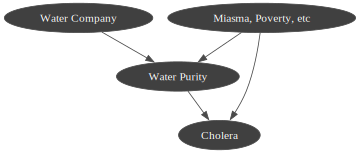

In [4]:
c2 = gum.fastBN("Cholera<-Miasma, Poverty, etc->Water Purity->Cholera;Water Purity<-Water Company")
gnb.show(c2)

> "Water Company" is an "<b>instrumental variable</b>" :
+ The variable "Water Company" is highly correlated with the outcome "Cholera" (according to statistics that Dr. snow gathered), mortality (victims of cholera) is much higher in households served by the contaminated water company.
+ The variable "Water Company" has not a causal effect on the outcome: "Cholera", water companies do not inoculate cholera to their customers, the correlation between the instrument and the outcome mentioned above, is due to the effect of some intermediate variable (no arrow between Water Company and Cholera in the causal diagram).
+ The instrument has a causal effect on the treatment "Water Purity" , we saw that one of the two companies was distributing water contaminated by the excrements of cholera victims (presence of an arrow between Water Company and Water Purity in the causal diagram).
+ The variable "Water Company" is as if it was randomly assigned. (no incoming arrows in the causal diagram)
+ The correlation between "Water Company" and "Water Purity" that is observed in the data, is the causal effect of the instrument over treatment.
+ Since the instrument is as if it was randomly assigned (no incoming arrows), it can't be correlated with any other confounders of the relationship between it and the outcome. <br>
<b>So we have unsuccessfully explored all possible explanations for the correlation between the instrument "Water Company" and the outcome "Cholera" but one, it is that the treatment "water purity" did have a causal effect over the outcome.</b><br>
So Dr. Snow used the instrumental variable "Water Company" to adjust for unobserved confounding factors.

Using the method of path coefficients, we can find the effect of treatment over the outcome using rung one information: correlations $c_{ZY}$ and $c_{ZX}$, without having any data on confounders.

![title](images/figure.7.9.png)

Z and X are unconfounded.
$$\implies c_{ZX} = a ... (1)$$ 
Z and Y are unconfounded, $Z \rightarrow X \leftarrow U \rightarrow Y$ is not an open path, it is blocked by the collider node X, we don't need to account for U to assess the causal effect of Z on Y 
$$\implies c_{ZY} = a \times b ... (2)$$
$$(1)\ and\ (2) \implies b = \frac{c_{ZY}}{c_{ZX}} $$